# Health Insurance Cross Sell Prediction using FEDOT and LLM

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join(os.sep.join(['..', '..'])))
if module_path not in sys.path:
    sys.path.append(module_path)

from langchain.chat_models import init_chat_model
from fedot_llm.main import FedotAI

In [2]:
dataset_path = '../../datasets/Health_Insurance'

In [3]:
description="""Our client is an Insurance company that has provided Health Insurance to its customers 
now they need your help in building a model to predict whether the policyholders (customers) from past year 
will also be interested in Vehicle Insurance provided by the company.\n
Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company 
because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.\n
Now, in order to predict, whether the customer would be interested in Vehicle insurance, 
you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc."""

In [4]:
fedot_ai =  FedotAI(dataset_path, 
        description, 
        init_chat_model(model="llama3.1",
                        model_provider='ollama'),
                        display='jupyter')
predictions = await fedot_ai.predict()

# Progress:
- [x] Define Dataset Name
- [x] Define Dataset Description
- [x] Define Dataset Goal
- [x] Define Train Split
- [x] Define Test Split
- [x] Define Target Column
- [x] Define Task Type
- [x] Create Column Descriptions And Define Columns Category
- [x] Fedot makes predictions
- [x] Fedot Analyze Results

Here is the pipeline of the model I built:

**Model Pipeline**
The pipeline consists of:
* **Random Forest (RF)**: This stage uses a random forest algorithm with 12 jobs parallelized to process the data. The specific implementation details are not specified, but it's likely used for feature selection and/or classification.
* **Scaling**: This stage applies some form of scaling or standardization to the data. The exact method is unspecified, but it's likely used to prevent feature dominance in the model.

**Model Metrics**
| Metric | Value |
| --- | --- |
| roc_auc | 0.844 |
| accuracy | 0.871 |

These metrics indicate that:
* **ROC AUC (Receiver Operating Characteristic Area Under Curve)**: This metric measures the model's ability to distinguish between positive and negative classes. A higher value indicates better performance, with a perfect model scoring 1. In this case, the model scores 0.844.
* **Accuracy**: This metric measures the proportion of correctly classified instances. The model achieves an accuracy of 0.871, meaning it correctly classifies about 87.1% of instances.

In [5]:
predictions.predictions[-10:-30:-2]

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

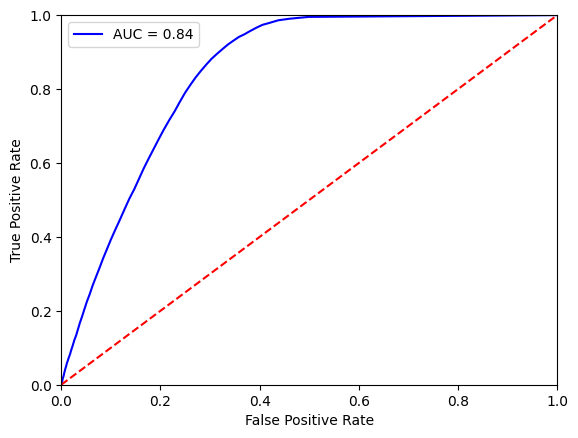

In [6]:
predictions.auto_model.plot_prediction()

In [7]:
path_to_save = f'{module_path}/saved_pipelines'
predictions.best_pipeline.save(path=path_to_save, create_subdir=True, is_datetime_in_path=True)

('{\n    "total_pipeline_operations": [\n        "scaling",\n        "rf"\n    ],\n    "depth": 2,\n    "nodes": [\n        {\n            "operation_id": 1,\n            "operation_type": "scaling",\n            "operation_name": "ScalingImplementation",\n            "custom_params": {},\n            "params": {},\n            "nodes_from": [],\n            "fitted_operation_path": [\n                "fitted_operations",\n                "operation_1.pkl"\n            ],\n            "rating": null\n        },\n        {\n            "operation_id": 0,\n            "operation_type": "rf",\n            "operation_name": "RandomForestClassifier",\n            "custom_params": {\n                "n_jobs": 12\n            },\n            "params": {\n                "n_jobs": 12\n            },\n            "nodes_from": [\n                1\n            ],\n            "fitted_operation_path": [\n                "fitted_operations",\n                "operation_0.pkl"\n            ],\n   